In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

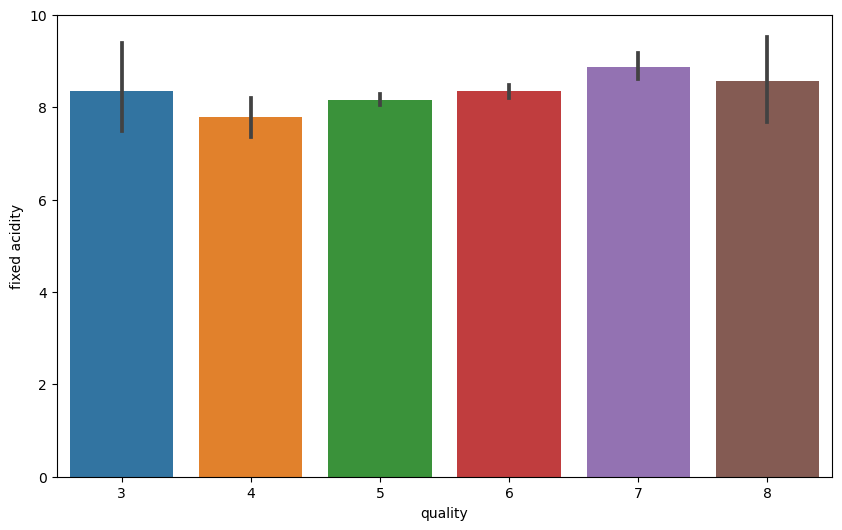

In [7]:
# fixed acidity vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'fixed acidity',data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

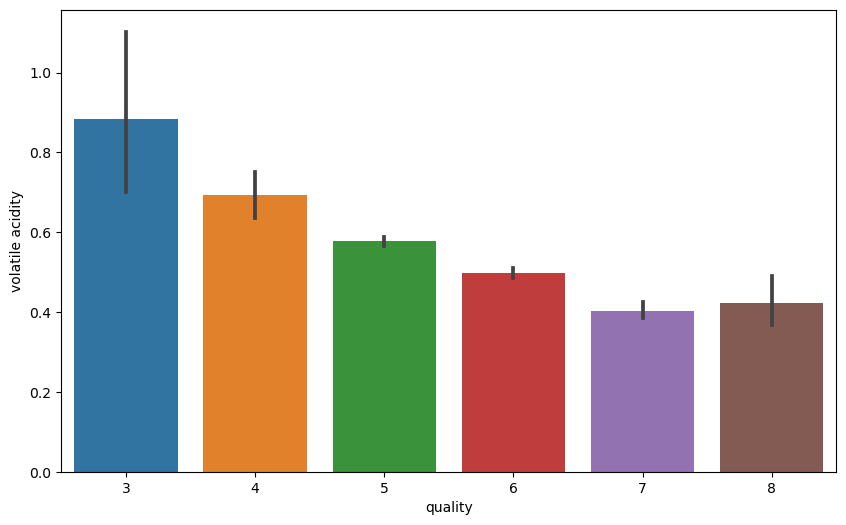

In [9]:
#  volatile acidity  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'volatile acidity',data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

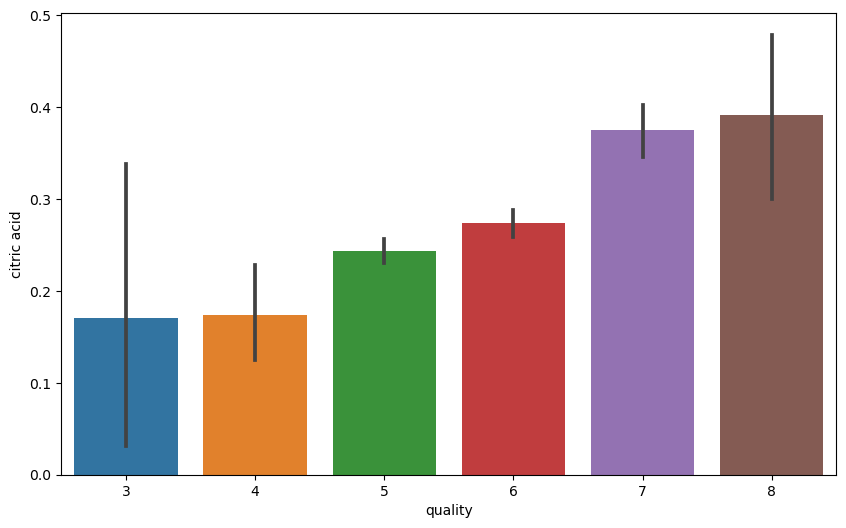

In [10]:
#  citric acid vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'citric acid',data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

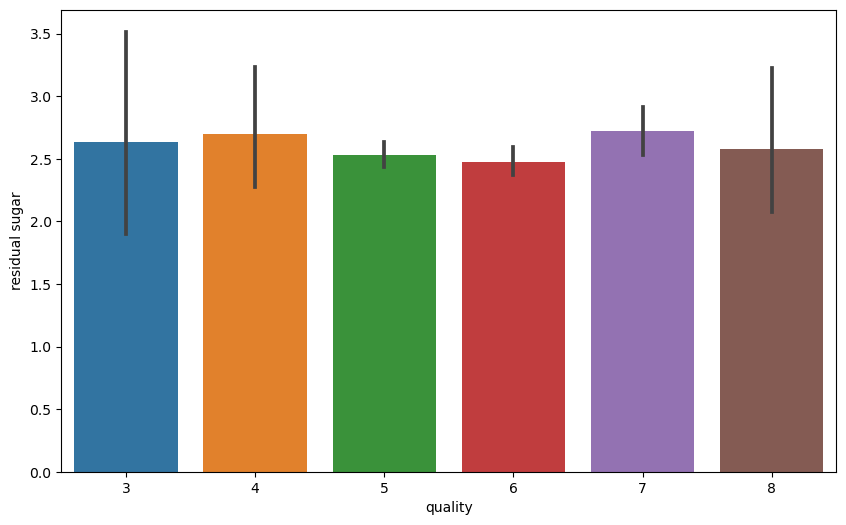

In [11]:
# residual sugar vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'residual sugar',data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

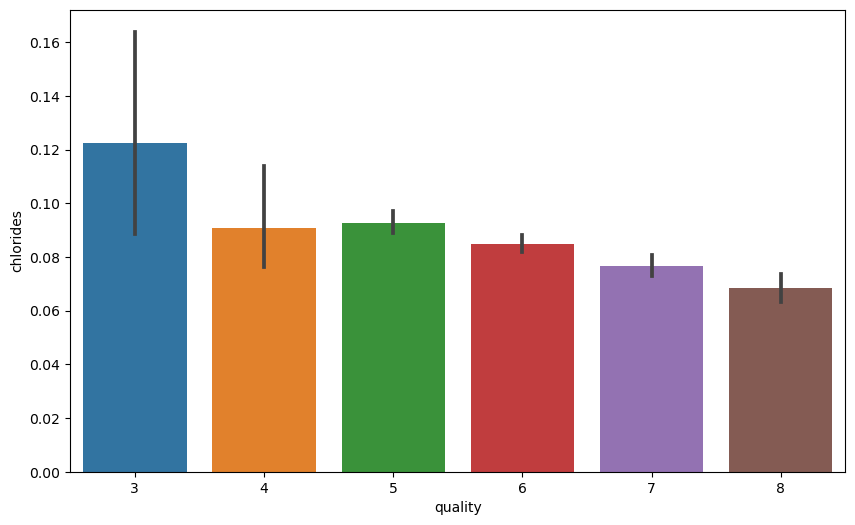

In [12]:
#  chlorides vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'chlorides',data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

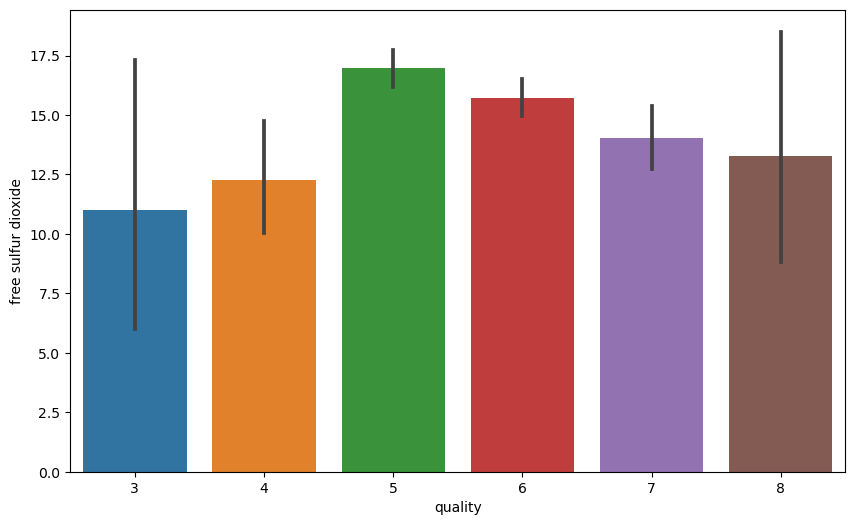

In [13]:
 #  free sulfur dioxide vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'free sulfur dioxide',data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

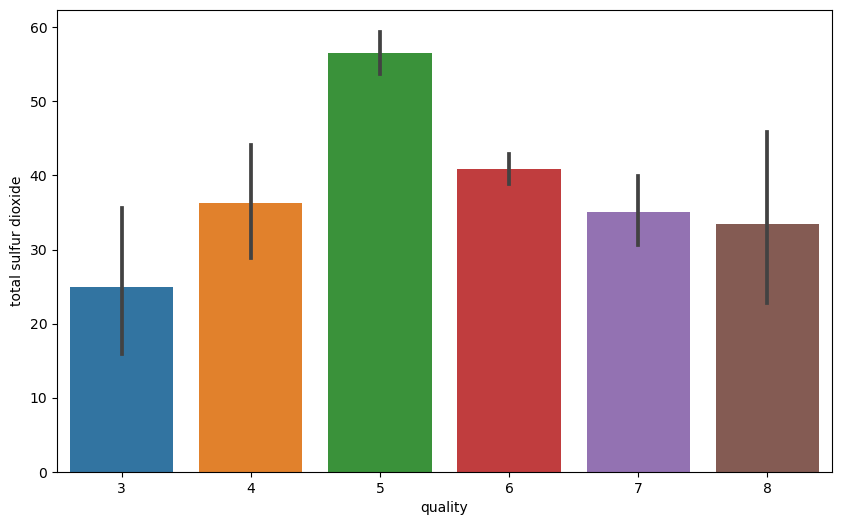

In [14]:
 # total sulfur dioxide vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'total sulfur dioxide',data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

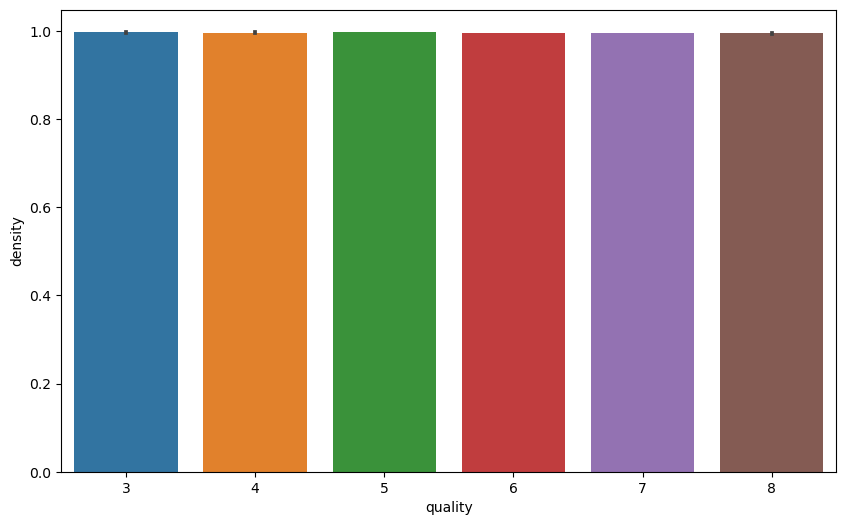

In [15]:
 # density vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'density',data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

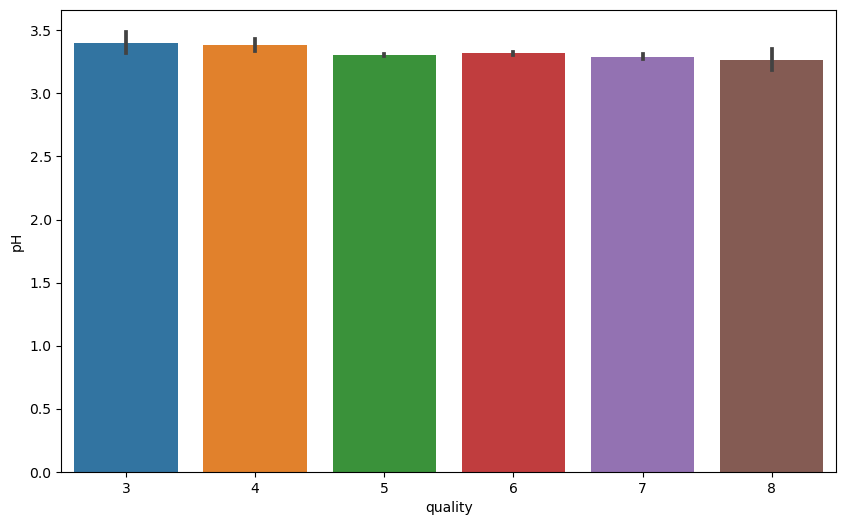

In [16]:
 # pH  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'pH',data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

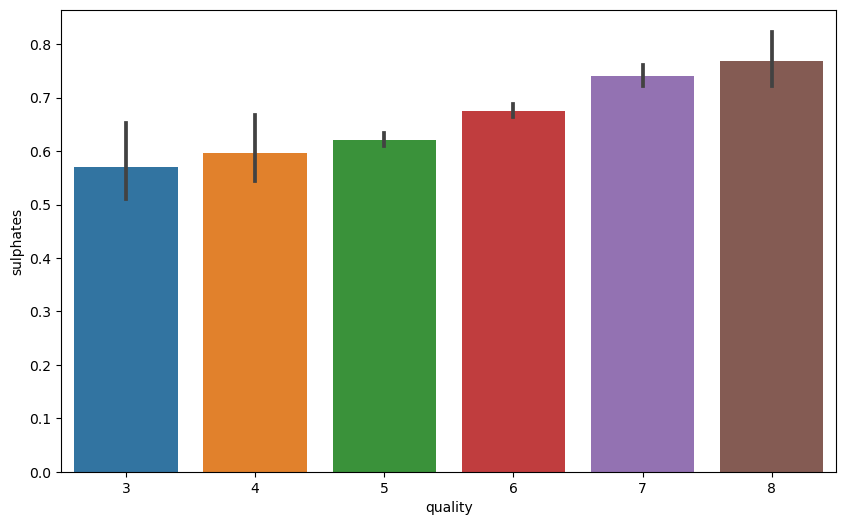

In [17]:
 #  sulphates  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'sulphates',data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

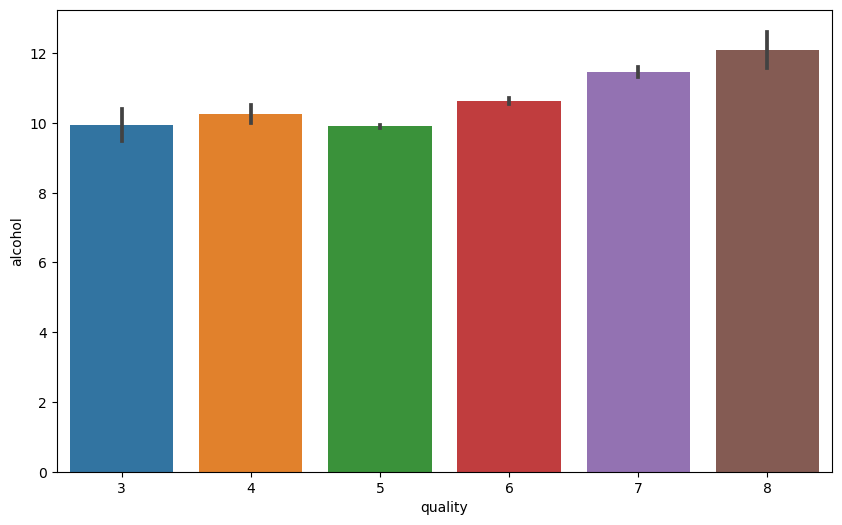

In [18]:
 # alcohol  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality',y = 'alcohol',data = df)

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df['quality']=df['quality'].apply(lambda x:0 if x > 6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1599
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

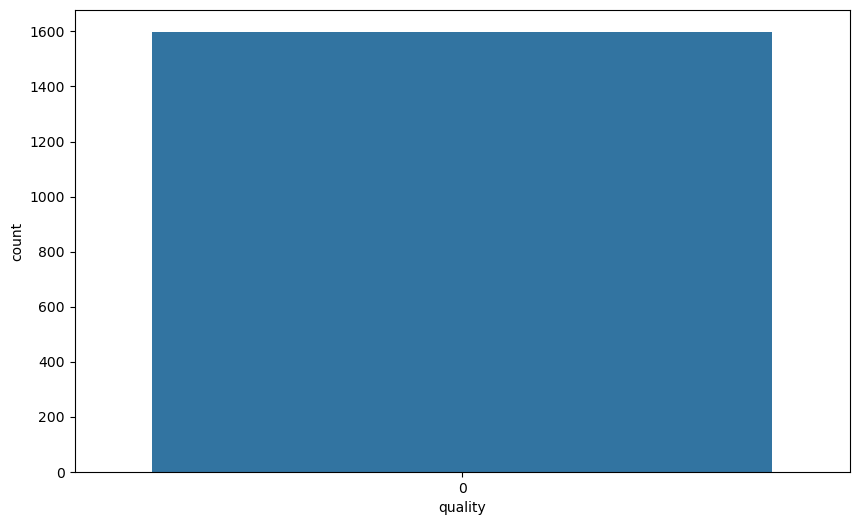

In [17]:
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot(df['quality'])

In [6]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1]. values

In [7]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [8]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.2, random_state=42)
print("x-train shape:", x_train.shape)
print("x-test shape:", x_test.shape)
print("y-train shape:", y_train.shape)
print("y-test shape:", y_test.shape)

x-train shape: (1279, 11)
x-test shape: (320, 11)
y-train shape: (1279,)
y-test shape: (320,)


In [11]:
sc = StandardScaler()

x_train =sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)

In [12]:
rf_regressor = RandomForestClassifier(n_estimators= 100)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

[[320]]


<Figure size 1000x600 with 0 Axes>

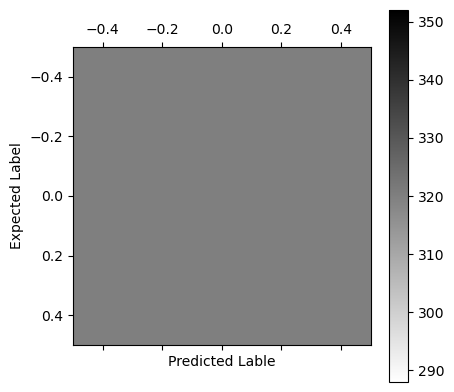

In [14]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
fig = plt.figure(figsize=(10,6))
plt.matshow (cm, cmap = plt.cm.binary, interpolation ='nearest')
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Lable")
plt.show()

In [16]:
print("Total Predictions:", len(y_pred))
print("Correct Predictions:", sum(y_pred == y_test))
print("Incorrect Predictions:", sum(y_pred != y_test))
print("Accuracy:", sum(y_pred== y_test)*100/len(y_pred),"%")

Total Predictions: 320
Correct Predictions: 320
Incorrect Predictions: 0
Accuracy: 100.0 %


In [19]:
rf_eval=cross_val_score(estimator=rf_regressor,x= x_train, y= y_train,cv = 10)
rf_eval.mean()

TypeError: cross_val_score() got an unexpected keyword argument 'x'